In [46]:
import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

from zse.collections import *
from zse.utilities import *

In [2]:
f = open('crum_rings.txt','r')
alllines=f.readlines()
f.close()

In [4]:
def get_fw_data(file,code):
    file = open(file,'r')
    data = file.readlines()
    file.close()
    
    for i,line in enumerate(data):
        fields = line.split()
        if fields[0] == code:
            start = i
            break
    
    # go through fw chunk and get data
    
    t_sites = {}
    o_sites = {}
    for i,line in enumerate(data[start+1:]):
        line = line.rstrip(' \n')
        
        # check if the rings exist
        
#         if 'FAILED' in line or 'LARGE' in line:
#             return(False,False)
#         fields = line.split()
        
        # get the t site rings
        
        if 'T' in line and ':' in line:
            fields = line.split(':')
            t_sites[fields[0]]=fields[1]
#         for x in t_sites:
#             r = t_sites[x].split('_')
#             if len(r)>20:
#                 return(False,False)
                
        
        # get the o site rings
        if 'O' in line and ':' in line:
            fields = line.split(':')
            o_sites[fields[0]]=fields[1]
#         for x in o_sites:
#             r = o_sites[x]
#             if len(r)>20:
#                 return(False,False)
        
        
        
        fields = line.split()
        if fields[0] == 'Framework':
            end = i+start-1
            break

    return(t_sites,o_sites)    

In [26]:
file = 'goetzke_rings.txt'
fws = get_all_fws()
g_counts = np.zeros(19)
for f in fws:
    tsites,osites = get_fw_data(file,f)
    frings = []
    for t in tsites:
        trings = tsites[t].split('_')
        frings += [int(x) for x in trings]
    frings = np.unique(frings)
    for x in frings:
        if x <=18:
            g_counts[x]+=1
print(g_counts)

[  0.   0.   0.  24. 237. 121. 229.   7. 193.  12. 141.   3. 145.   1.
  59.   2.  16.   0.  21.]


In [27]:
file = 'crum_rings.txt'
fws = get_all_fws()
c_counts = np.zeros(19)
for f in fws:
    tsites,osites = get_fw_data(file,f)
    frings = []
    for t in tsites:
        trings = tsites[t].split('_')
        frings += [int(x) for x in trings]
    frings = np.unique(frings)
    for x in frings:
        if x <=18:
            c_counts[x]+=1
print(c_counts)

[  0.   0.   0.  24. 237. 121. 224.   7. 154.  12.  85.   3. 109.   1.
  15.   2.   4.   0.   7.]


In [107]:
iza = pd.read_csv('iza_data.csv')
fws = iza['Framework'].values
rings = iza['Rings'].values
i_counts = np.zeros(19)
for r in rings:
    frings = []
    if type(r) == str:
        r = r.split('_')
        frings += [int(x) for x in r]
    frings = np.unique(frings)
    for x in frings:
        if x <=18:
            i_counts[x]+=1
print(i_counts)

[  0.   0.   0.  24. 236. 120. 218.   5. 147.  12.  74.   2.  73.   0.
  10.   1.   2.   0.   5.]


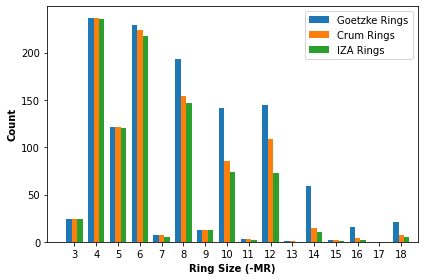

In [78]:
ring_sizes = np.arange(19)
width = 0.25
plt.bar(ring_sizes,g_counts,width,label='Goetzke Rings')
plt.bar(ring_sizes+width,c_counts,width,label='Crum Rings')
plt.bar(ring_sizes+2*width, i_counts,width,label='IZA Rings')
plt.xlim([2,19])
plt.xticks(np.arange(3,19)+2*width/2,np.arange(3,19))
#plt.yticks([])
plt.ylabel('Count',weight='bold')
plt.xlabel('Ring Size (-MR)',weight='bold')
plt.tight_layout()
plt.legend()
plt.savefig('../figures/completed-figures/ring-counts.pdf',dpi=300)
plt.show()

In [45]:
i = 1
for f in sorted(fws):
    r = get_ring_sizes(f)
    print(i,f,r)
    i+=1

1 ABW [8 6 4]
2 ACO [8 4]
3 AEI [8 6 4]
4 AEL [10  6  4]
5 AEN [8 6 4]
6 AET [14  6  4]
7 AFG [6 4]
8 AFI [12  6  4]
9 AFN [8 6 4]
10 AFO [10  6  4]
11 AFR [12  8  6  4]
12 AFS [12  8  6  4]
13 AFT [8 6 4]
14 AFV [8 6 4]
15 AFX [8 6 4]
16 AFY [12  8  4]
17 AHT [10  6  4]
18 ANA [8 6 4]
19 APC [8 6 4]
20 APD [8 6 4]
21 AST [6 4]
22 ASV [12  6  4]
23 ATN [8 6 4]
24 ATO [12  6  4]
25 ATS [12  6  4]
26 ATT [8 6 4]
27 ATV [8 6 4]
28 AVE [8 6 4]
29 AVL [8 6 4]
30 AWO [8 6 4]
31 AWW [8 6 4]
32 BCT [8 6 4]
33 BEA [12  6  5  4]
34 BEC [12  6  5  4]
35 BIK [8 6 5]
36 BOF [10  6  5  4]
37 BOG [12 10  6  5  4]
38 BOZ [10  8  6  4  3]
39 BPH [12  8  6  4]
40 BRE [8 6 5 4]
41 BSV [12  6  4]
42 CAN [12  6  4]
43 CAS [8 6 5]
44 CDO [8 5]
45 CFI [14  6  5  4]
46 CGF [10  8  6  4]
47 CGS [10  8  6  4]
48 CHA [8 6 4]
49 CHI [9 6 5 4]
50 CLO [20  8  6  4]
51 CON [12 10  6  5  4]
52 CSV [10  8  6  5  4]
53 CTH [14 10  6  5  4]
54 CZP [12  8  4]
55 DAC [10  8  5  4]
56 DDR [8 6 5 4]
57 DFO [12 10  8  6  4]


In [43]:
print(len(fws))

253


# Number of T and O sites through all the frameworks

In [113]:
iza = pd.read_csv('iza_data.csv')
fws = iza['Framework'].values
iza.set_index('Framework',inplace=True)
file = 'goetzke_rings.txt'
fws = get_all_fws()
t_count = 0
o_count = 0
for f in sorted(fws):
    count = 0
    count2 = 0
    tsites,osites = get_fw_data(file,f)
    for t in tsites:
        t_count += 1
    for o in osites:
        o_count += 1
print('# of T-Sites',t_count)
print('# of O-sites',o_count)

# of T-Sites 1460
# of O-sites 3219


In [115]:
# of unique Goetzke T-Sites
file = 'goetzke_rings.txt'
fws = get_all_fws()
t_ring_list = []
o_ring_list = []
for f in fws:
    tsites,osites = get_fw_data(file,f)
    for t in tsites:
        t_ring_list.append(tsites[t]) 
    for o in osites:
        o_ring_list.append(osites[o])


In [117]:
ut = np.unique(t_ring_list)
print(len(ut))
uo = np.unique(o_ring_list)
print(len(uo))

993
1286


In [124]:
from collections import Counter
counts = sorted(Counter(t_ring_list).items(),key = lambda item:(-item[1],item[0]))
for c in counts[:10]:
    print(c)

('5_5_5_5_5_5_10_10_10_10', 23)
('4_5_5_5_6_6_10_10_10_12_12_12_12', 14)
('4_5_5_5_6_6_8_8_8_8_8_10', 14)
('5_5_5_5_5_6_6_6_10_12', 14)
('5_5_5_5_6_6_6_8_8_10_10_10', 14)
('5_5_5_5_5_6_6', 10)
('4_5_5_5_5_6_6_8_8_8_8_8_8_12_12_12_12_12_12', 9)
('5_5_5_5_5_5_10_10_10_10_12_12_12', 9)
('4_4_6_6_6_6_10_10_10_10_10_10_10_10_10_10_12_12_12_12_12_12_12_12_12_12_12_12_12_12_12_12_12_12_12_12', 8)
('4_4_6_6_6_6_10_10_10_10_10_10_10_10_12_12_12_12_12_12_12_12_12_12_12_12_12_12', 7)


In [125]:
# of unique Crum T-Sites
file = 'crum_rings.txt'
fws = get_all_fws()
t_ring_list = []
o_ring_list = []
for f in fws:
    tsites,osites = get_fw_data(file,f)
    for t in tsites:
        t_ring_list.append(tsites[t]) 
    for o in osites:
        o_ring_list.append(osites[o])



In [126]:
ut = np.unique(t_ring_list)
print(len(ut))
uo = np.unique(o_ring_list)
print(len(uo))

808
799


In [127]:
from collections import Counter
counts = sorted(Counter(t_ring_list).items(),key = lambda item:(-item[1],item[0]))
for c in counts[:10]:
    print(c)

('4_4_4_8_8_8_8', 31)
('5_5_5_5_5_5_10_10_10_10', 25)
('4_4_6_6_6_6', 17)
('5_5_5_5_5_6_6_6_10', 17)
('4_4_4_6_8_8_12', 16)
('4_4_4_6_6_8', 14)
('4_4_4_6_8_8', 14)
('4_5_5_5_6_6_8_8_8_8_8_10', 14)
('5_5_5_5_6_6_6_8_8_10_10_10', 14)
('4_5_5_5_6_6_10_10_10_12_12_12', 13)


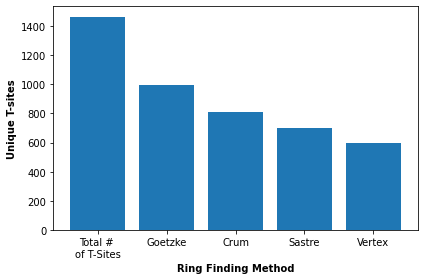

In [134]:
counts = [1460,993,808,700,600]
xax = [1,2,3,4,5]
plt.bar(xax,counts)
plt.xticks(np.arange(1,6),['Total # \nof T-Sites','Goetzke','Crum','Sastre','Vertex'])
plt.xlabel('Ring Finding Method',weight='bold')
plt.ylabel('Unique T-sites',weight='bold')
plt.tight_layout()
plt.savefig('../figures/completed-figures/unique-ts.pdf',dpi=300)
plt.show()